<a href="https://colab.research.google.com/github/vinu1996/British-Airways-Review/blob/main/scoring%20project%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train a scoring model

In this project, you will put yourself in the shoes of a data scientist working in a banking organisation. You work for the credit risk unit, and they ask you to use their data to provide them with a reliable model for detecting credit defaults.

# import of packages

Complete with the packages you need.

In [ ]:
import pandas as pd
import numpy as np

# Data

## Loading in the Colab environment

You will use data from a Kaggle competition.

You will find the dataset and more information informations about it, with this [link](https://www.kaggle.com/c/home-credit-default-risk/overview).

So that you don't bother to download the data, I did it for you.

I share the data with you from my google drive.

Before starting please import the TP files via the link below:

https://drive.google.com/drive/folders/1zYotRg3l_m66JQRrGYi1VkuW0A0tfC4K?usp=sharing

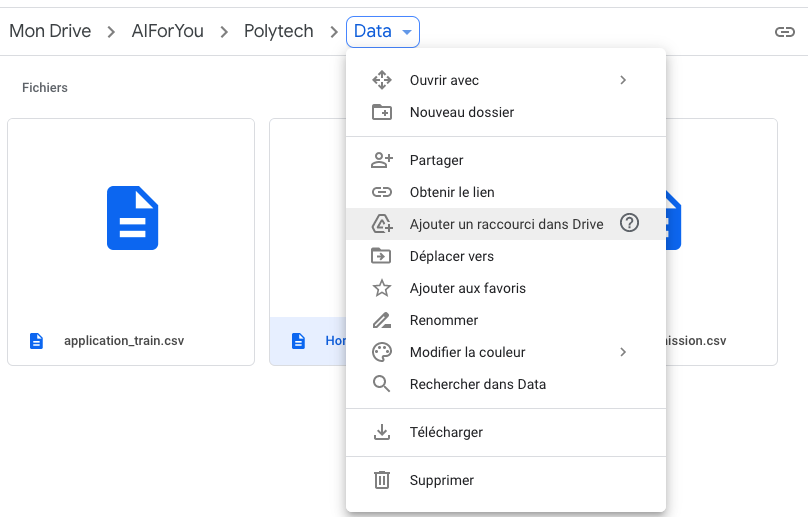

Add a shortcut to your drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


## Data import

Import of the data to be used during model training.

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Data/application_train.csv')

Quick overview of the data.

In [47]:
data.head()
data.shape

(307511, 81)

# Data exploration

Explore your data to see what it's made of. Think about visualising and quantifying the interactions between your explanatory data and your target variable.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [57]:
#data cleaning
missing_values=data.isnull().mean()*100
print(missing_values[missing_values > 0].sort_values(ascending=False))  # Only show columns with missing values
high_missing=missing_values[missing_values > 50].index
data_cleaned=data.drop(columns=high_missing)
data_cleaned.shape

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

(307511, 81)

In [58]:
data_cleaned.shape

missing_numerical = [
    col for col in data_cleaned.select_dtypes(include=['int', 'float']).columns
    if data_cleaned[col].isnull().sum() > 0
]
missing_categorical=[
    col for col in data_cleaned.select_dtypes(include=['object','category']).columns
    if data_cleaned[col].isnull().sum()>0
]

for col in missing_numerical:
  data_cleaned[col].fillna(data_cleaned[col].median(),inplace=True)


# Using OneHotEncoder from scikit-learn
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output

encoder.fit(data_cleaned.loc[:, missing_categorical])  # Fit on missing_categorical columns

encoded_features = encoder.transform(data_cleaned.loc[:, missing_categorical])

encoded_df = pd.DataFrame(encoded_features,
                           columns=encoder.get_feature_names_out(missing_categorical))

data_cleaned = pd.concat([data_cleaned, encoded_df], axis=1)




<ipython-input-58-e6871035ddce>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna(data_cleaned[col].median(),inplace=True)


In [64]:
# Create a list of prefixes to drop
prefixes_to_drop = ['EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE']

# Drop columns starting with any of the prefixes
data_cleaned_copy = data_cleaned.drop(columns=[col for col in data_cleaned.columns
                                               if any(col.startswith(prefix) for prefix in prefixes_to_drop)])
data_cleaned_copy.shape

(307511, 78)

In [68]:
data_cleaned_copy.isnull().sum().sort_values(ascending=False)

,0
SK_ID_CURR,0
OBS_60_CNT_SOCIAL_CIRCLE,0
FLAG_DOCUMENT_6,0
FLAG_DOCUMENT_5,0
FLAG_DOCUMENT_4,0
...,...
FLAG_EMAIL,0
FLAG_PHONE,0
FLAG_CONT_MOBILE,0
FLAG_WORK_PHONE,0


# Data selection

Select from among the available variables those that seem most promising for the training of your model.

In [71]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler=StandardScaler()
X_scaled=scaler.fit_transform(data_cleaned_copy)

pca=PCA(n_components=0.95)
X_pca=pca.fit_transform(X_scaled)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 78 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_INCOME_TYPE              307511 non-null  object 
 12  NAME_EDUCATION_TYPE           307511 non-nul

# Data Cleaning

Implement data cleaning to remove missing values.

In [ ]:
# Your code

# Data spliting

Sequencing of data sets for model training.

If you need help, feel free to check the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [ ]:
# Your code

# Establish a baseline model

Create a very simple template (without machine learning) that will serve as a reference for the rest of the project.

In [ ]:
# Your code

# Use Logistic regression algorithm to train a model

If you need help feel free to check the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

### Data preprocessing

In [ ]:
# Your code

### Train your model on the training dataset

In [ ]:
# Your code

### Evaluate your model on the testing dataset

In [ ]:
# Your code

### Find the best set of hyperparameters

Feel free to find the best hyperparameters of the penalized logistic regression.

Use the Gridsearch algorithm to find the best set of hyparameters for your model.

If you need feel free to chekc the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
# Your code

### Graphical representation of the result

You can use ROC curve

In [ ]:
# Your code

### Interpret the coefficient

In [ ]:
# Your code

### Make a conclusion about this model to solve you scoring model

In [ ]:
# Your conclusion

# Use decision tree algorithm to train a model

If you need help feel free to check the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

### Train your model on the training dataset

In [ ]:
# Your code

### Evaluate your model on the testing dataset

In [ ]:
# Your code

### Find the best set of hyperparameters

Use the Gridsearch algorithm to find the best set of hyparameters for your model.

If you need feel free to chekc the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
# Your code

### Graphical representation of the result

You can use ROC curve

In [ ]:
# Your code

### Visualize the tree

In [ ]:
# Your code

### Make a conclusion about this model to solve you scoring model

In [ ]:
# Your conclusion

# Use the random forest algorithm to train a model

If you need help feel free to check the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

### Train your model on the training dataset

In [ ]:
# Your code

### Evaluate your model on the testing dataset

In [ ]:
# Your code

### Find the best set of hyperparameters

Use the Gridsearch algorithm to find the best set of hyparameters for your model.

If you need feel free to chekc the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
# Your code

### Extract the feature importance of the model

In [ ]:
# Your code

### Graphical representation of the result

You can use ROC curve

In [ ]:
# Your code

### Make a conclusion about this model to solve you scoring model

In [ ]:
# Your conclusion

# Use Gradient Boosting Tree algorithm to train a model

If you need help feel free to check the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

### Train your model on the training dataset

In [ ]:
# Your code

### Evaluate your model on the testing dataset

In [ ]:
# Your code

### Find the best set of hyperparameters

Use the Gridsearch algorithm to find the best set of hyparameters for your model.

If you need feel free to chekc the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
# Your code

### Extract the feature importance of the model

In [ ]:
# Your code

### Graphical representation of the result

You can use ROC curve

In [ ]:
# Your code

### Make a conclusion about this model to solve you scoring model

In [ ]:
# Your conclusion

# Compare all you model to solve the scoring problem

### Metrics comparaison

In [ ]:
# Your code

### Graphical comparaison

In [ ]:
# Your code

# Make a general conclusion for this project

In [ ]:
# Your conclusion